In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import json
from pandas.io.json import json_normalize
from datetime import datetime
from sklearn import preprocessing

In [3]:
df = pd.read_csv("PromoData2017.csv")

In [4]:
df.head()

,Customer ID,Gender,Age,Discount,JanuarySpend,DecSpend
0,4,Female,50,55,890.694435,136.687048
1,6,Female,49,5,120.579431,762.218427
2,7,Female,41,0,397.038695,740.697250
3,9,Male,45,0,811.224296,558.345793
4,11,Female,28,60,-245.993557,683.435239


In [22]:
df.shape

(2409, 6)

(array([  2.,   2.,   1., 558., 398., 633., 558.,  78.,  78., 101.]),
 array([-641.2334611 , -418.46263999, -195.69181888,   27.07900223,
         249.84982334,  472.62064445,  695.39146556,  918.16228667,
        1140.93310778, 1363.70392889, 1586.47475   ]),
 <a list of 10 Patch objects>)

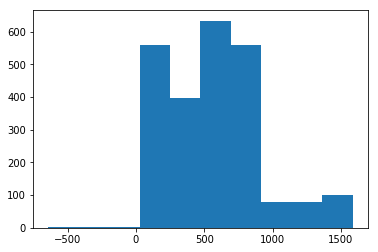

In [5]:
plt.hist(df['DecSpend'])

(array([  7.,  22.,  29., 444., 876., 600., 339.,  49.,  20.,  23.]),
 array([-839.1358833 , -565.26802127, -291.40015924,  -17.53229721,
         256.33556482,  530.20342685,  804.07128888, 1077.93915091,
        1351.80701294, 1625.67487497, 1899.542737  ]),
 <a list of 10 Patch objects>)

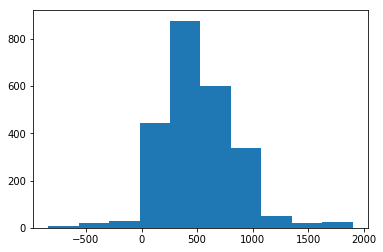

In [6]:
plt.hist(df['JanuarySpend'])

(array([1302.,   96.,  102.,   99.,   99.,  192.,   99.,  141.,   93.,
         186.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <a list of 10 Patch objects>)

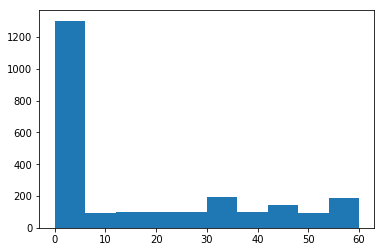

In [7]:
plt.hist(df['Discount'])

(array([455., 462., 460., 215., 225., 266., 235.,  85.,   0.,   6.]),
 array([15. , 19.8, 24.6, 29.4, 34.2, 39. , 43.8, 48.6, 53.4, 58.2, 63. ]),
 <a list of 10 Patch objects>)

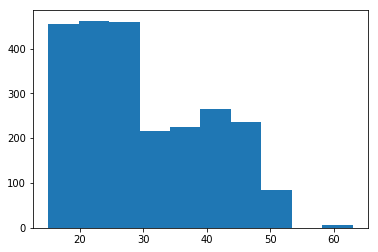

In [8]:
plt.hist(df['Age'])

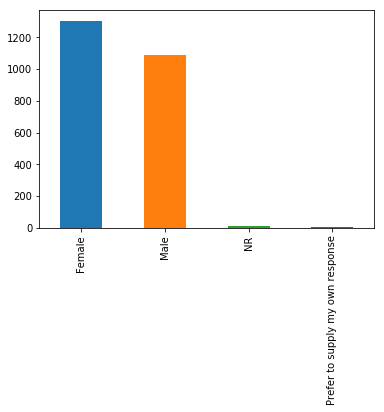

In [9]:
df['Gender'].value_counts().plot(kind='bar')

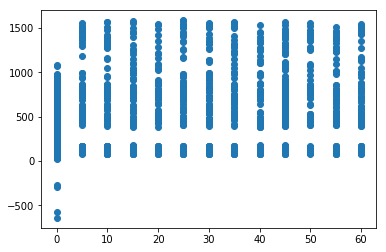

In [10]:
plt.scatter(df["Discount"],df["DecSpend"])

In [12]:
df['JanuarySpend'].describe()

count    2409.000000
mean      510.890399
std       330.234228
min      -839.135883
25%       279.835312
50%       474.904880
75%       715.534643
max      1899.542737
Name: JanuarySpend, dtype: float64

In [13]:
df['DecSpend'].describe()

count    2409.000000
mean      562.051566
std       347.584326
min      -641.233461
25%       308.047662
50%       545.410236
75%       760.133090
max      1586.474750
Name: DecSpend, dtype: float64

C:\Users\Michelle\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
C:\Users\Michelle\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  from ipykernel import kernelapp as app


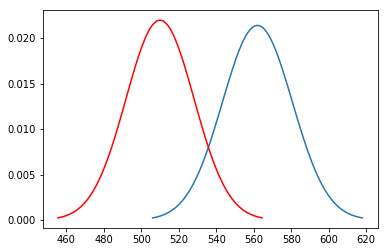

Ttest_indResult(statistic=-5.2374290740710965, pvalue=1.6976431562233368e-07)


In [21]:
import math
import matplotlib.mlab as mlab

mu = 562
variance = 348
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))


Jmu = 510
Jvariance = 330
Jsigma = math.sqrt(Jvariance)
Jx = np.linspace(Jmu - 3*Jsigma, Jmu + 3*Jsigma, 100)
plt.plot(Jx,mlab.normpdf(Jx, Jmu, Jsigma),color="red")
plt.show()

import scipy

print(scipy.stats.ttest_ind(df['JanuarySpend'], df['DecSpend']))

#result: no significance
# but this not valid cause not treatment/control

Discounting is total shit...

less discounting more spendinG??

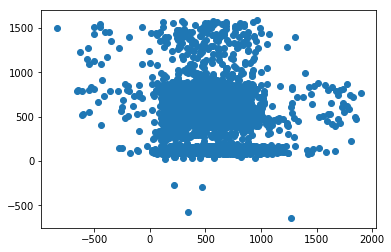

In [22]:
plt.scatter(df['JanuarySpend'],df['DecSpend'])

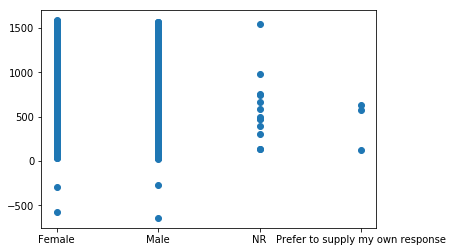

In [23]:
plt.scatter(df['Gender'],df['DecSpend'])

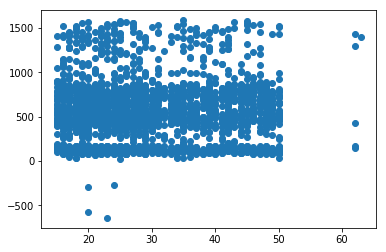

In [24]:
plt.scatter(df['Age'],df['DecSpend'])

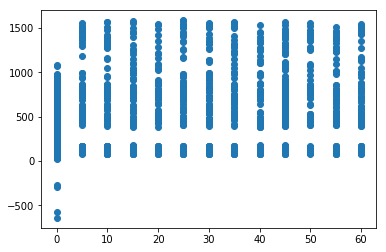

In [25]:
plt.scatter(df['Discount'],df['DecSpend'])

Segregate by age

In [26]:
df['Age'].describe()

count    2409.000000
mean       29.815276
std        10.211078
min        15.000000
25%        21.000000
50%        28.000000
75%        38.000000
max        63.000000
Name: Age, dtype: float64

In [27]:
dfY = df.loc[df['Age'] < 30]
dfO = df.loc[df['Age'] > 30]

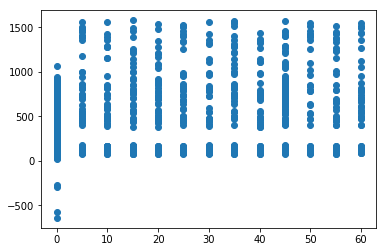

In [28]:
plt.scatter(dfY['Discount'],dfY['DecSpend'])

In [23]:
plt.scatter(dfO['Discount'],dfO['JanSpend'])

NameError: name 'dfO' is not defined

C:\Users\Michelle\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


Coefficients: 
 [0.59950061]
Mean squared error: 129121.07
Variance score: -0.17


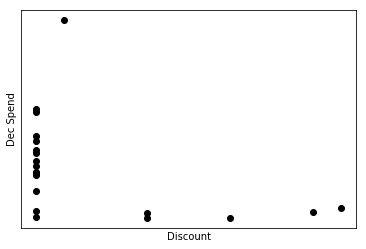

In [13]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

df.sort_values('Discount')

disc_train = df["Discount"].reshape(-1,1)


# Split the data into training/testing sets
Disc_train = disc_train[:-20]
Disc_test = disc_train[-20:]

# Split the targets into training/testing sets
DecSpend_train = df['DecSpend'][:-20]
DecSpend_test = df['DecSpend'][-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Disc_train, DecSpend_train)

# Make predictions using the testing set
DecSpend_pred = regr.predict(Disc_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(DecSpend_test, DecSpend_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(DecSpend_test, DecSpend_pred))

# Plot outputs
plt.scatter(Disc_test, DecSpend_test,  color='black')
#plt.plot(Disc_test, DecSpend_test, color='blue', linewidth=3)
plt.xlabel('Discount')
plt.ylabel('Dec Spend')
plt.xticks(())
plt.yticks(())

plt.show()

In [9]:
print(df[["Gender","Age","JanuarySpend","Discount"]])

      Gender  Age  JanuarySpend  Discount
0     Female   50    890.694435        55
1     Female   49    120.579431         5
2     Female   41    397.038695         0
3       Male   45    811.224296         0
4     Female   28   -245.993557        60
5     Female   18    255.345560         0
6     Female   44    484.485767         0
7       Male   20    733.903895         0
8     Female   24    535.774878         0
9     Female   34    325.076467         0
10      Male   36    808.685613        40
11    Female   30    579.401697        25
12      Male   27    455.024402        25
13    Female   31    843.614255        45
14    Female   29    470.649970         0
15      Male   23    115.981822        60
16      Male   49    645.159030         0
17      Male   24    488.072549        20
18    Female   19    304.559636         0
19      Male   21    741.524753        40
20      Male   23    318.617407         0
21    Female   40    297.246078         0
22    Female   32    228.078106   

In [10]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

df.sort_values('Discount')

disc_train = df[["Gender","Age","JanuarySpend","Discount"]]


# Split the data into training/testing sets
Disc_train = disc_train[:-20]
Disc_test = disc_train[-20:]

# Split the targets into training/testing sets
DecSpend_train = df['DecSpend'][:-20]
DecSpend_test = df['DecSpend'][-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Disc_train, DecSpend_train)

# Make predictions using the testing set
DecSpend_pred = regr.predict(Disc_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(DecSpend_test, DecSpend_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(DecSpend_test, DecSpend_pred))

# Plot outputs
plt.scatter(Disc_test, DecSpend_test,  color='black')
#plt.plot(Disc_test, DecSpend_test, color='blue', linewidth=3)
plt.xlabel('Discount')
plt.ylabel('Dec Spend')
plt.xticks(())
plt.yticks(())

plt.show()

ValueError: could not convert string to float: 'Female'

Coefficients: 
 [0.15839628]
Mean squared error: 127050.02
Variance score: -0.15


C:\Users\Michelle\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


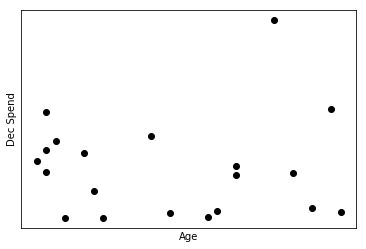

In [30]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

df.sort_values('Age')

age_train = df["Age"].reshape(-1,1)


# Split the data into training/testing sets
Age_train = age_train[:-20]
Age_test = age_train[-20:]

# Split the targets into training/testing sets
DecSpend_train = df['DecSpend'][:-20]
DecSpend_test = df['DecSpend'][-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Age_train, DecSpend_train)

# Make predictions using the testing set
DecSpend_pred = regr.predict(Age_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(DecSpend_test, DecSpend_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(DecSpend_test, DecSpend_pred))

# Plot outputs
plt.scatter(Age_test, DecSpend_test,  color='black')
#plt.plot(Disc_test, DecSpend_test, color='blue', linewidth=3)
plt.xlabel('Age')
plt.ylabel('Dec Spend')
plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [0.15470309]
Mean squared error: 143133.31
Variance score: -0.01


C:\Users\Michelle\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


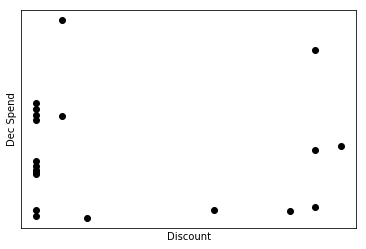

In [31]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

dfO.sort_values('Discount')

disc_train = dfO["Discount"].reshape(-1,1)


# Split the data into training/testing sets
Disc_train = disc_train[:-20]
Disc_test = disc_train[-20:]

# Split the targets into training/testing sets
DecSpend_train = dfO['DecSpend'][:-20]
DecSpend_test = dfO['DecSpend'][-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Disc_train, DecSpend_train)

# Make predictions using the testing set
DecSpend_pred = regr.predict(Disc_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(DecSpend_test, DecSpend_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(DecSpend_test, DecSpend_pred))

# Plot outputs
plt.scatter(Disc_test, DecSpend_test,  color='black')
#plt.plot(Disc_test, DecSpend_test, color='blue', linewidth=3)
plt.xlabel('Discount')
plt.ylabel('Dec Spend')
plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [0.83474078]
Mean squared error: 52180.26
Variance score: -0.15


C:\Users\Michelle\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


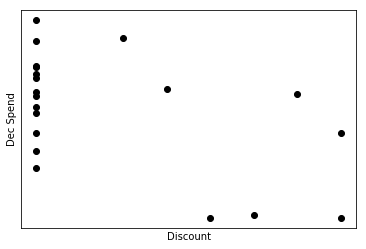

In [32]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

dfY.sort_values('Discount')

disc_train = dfY["Discount"].reshape(-1,1)


# Split the data into training/testing sets
Disc_train = disc_train[:-20]
Disc_test = disc_train[-20:]

# Split the targets into training/testing sets
DecSpend_train = dfY['DecSpend'][:-20]
DecSpend_test = dfY['DecSpend'][-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Disc_train, DecSpend_train)

# Make predictions using the testing set
DecSpend_pred = regr.predict(Disc_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(DecSpend_test, DecSpend_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(DecSpend_test, DecSpend_pred))

# Plot outputs
plt.scatter(Disc_test, DecSpend_test,  color='black')
#plt.plot(Disc_test, DecSpend_test, color='blue', linewidth=3)
plt.xlabel('Discount')
plt.ylabel('Dec Spend')
plt.xticks(())
plt.yticks(())

plt.show()

In [38]:
dfD = df.loc[df['Discount'] > 0]
dfD.head()

,Customer ID,Gender,Age,Discount,JanuarySpend,DecSpend
0,4,Female,50,55,890.694435,136.687048
1,6,Female,49,5,120.579431,762.218427
4,11,Female,28,60,-245.993557,683.435239
10,25,Male,36,40,808.685613,142.012134
11,26,Female,30,25,579.401697,406.091074


Coefficients: 
 [0.99295657]
Mean squared error: 106618.53
Variance score: -0.01


C:\Users\Michelle\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


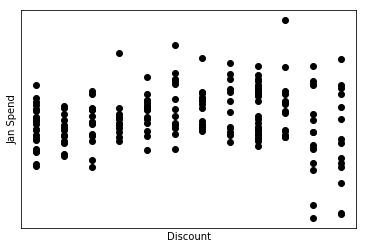

In [43]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

dfD.sort_values('Discount')

disc_train = dfD["Discount"].reshape(-1,1)


# Split the data into training/testing sets
Disc_train = disc_train[:-200]
Disc_test = disc_train[-200:]

# Split the targets into training/testing sets
DecSpend_train = dfD['JanuarySpend'][:-200]
DecSpend_test = dfD['JanuarySpend'][-200:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Disc_train, DecSpend_train)

# Make predictions using the testing set
DecSpend_pred = regr.predict(Disc_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(DecSpend_test, DecSpend_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(DecSpend_test, DecSpend_pred))

# Plot outputs
plt.scatter(Disc_test, DecSpend_test,  color='black')
#plt.plot(Disc_test, DecSpend_test, color='blue', linewidth=3)
plt.xlabel('Discount')
plt.ylabel('Jan Spend')
plt.xticks(())
plt.yticks(())

plt.show()

In [30]:
dfD = df.loc[dfD['Age'] > 30]
dfND = df.loc[df['Discount'] == 0]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [34]:
dfD.describe()

,Customer ID,Age,Discount,JanuarySpend,DecSpend
count,612.000000,612.000000,612.000000,612.000000,612.000000
mean,1218.689542,30.102941,47.230392,566.621321,582.670087
std,696.319575,10.253299,8.219624,376.281748,445.567278
min,4.000000,15.000000,35.000000,-839.135883,78.182362
25%,601.750000,22.000000,40.000000,391.406661,146.412697
50%,1238.500000,28.000000,45.000000,601.179644,506.606135
75%,1829.750000,38.000000,55.000000,817.897554,844.137259
max,2398.000000,62.000000,60.000000,1843.166126,1569.426330


In [35]:
dfND.describe()

,Customer ID,Age,Discount,JanuarySpend,DecSpend
count,1203.000000,1203.000000,1203.0,1203.000000,1203.000000
mean,1195.440565,29.708229,0.0,473.442664,555.409559
std,702.655734,10.239990,0.0,330.802425,205.361382
min,1.000000,15.000000,0.0,-441.233461,-641.233461
25%,574.500000,20.500000,0.0,244.563420,433.277982
50%,1201.000000,28.000000,0.0,384.293194,558.345793
75%,1795.500000,38.000000,0.0,644.940354,716.787522
max,2409.000000,62.000000,0.0,1899.542737,1082.148532


Ttest_indResult(statistic=-5.2374290740710965, pvalue=1.6976431562233368e-07)


C:\Users\Michelle\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
C:\Users\Michelle\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  from ipykernel import kernelapp as app


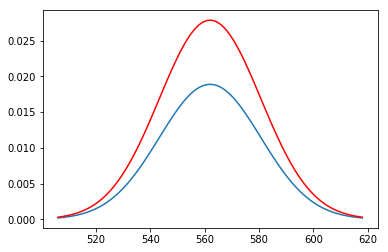

In [41]:
import math
import matplotlib.mlab as mlab

Dmu = 582
Dvariance = 446
Dsigma = math.sqrt(Dvariance)
Dx = np.linspace(Dmu - 3*Dsigma, Dmu + 3*Dsigma, 100)
plt.plot(x,mlab.normpdf(Dx, Dmu, Dsigma))


NDmu = 555
NDvariance = 205
NDsigma = math.sqrt(NDvariance)
NDx = np.linspace(NDmu - 3*NDsigma, NDmu + 3*NDsigma, 100)
plt.plot(x,mlab.normpdf(NDx, NDmu, NDsigma),color="red")

import scipy

print(scipy.stats.ttest_ind(df['JanuarySpend'], df['DecSpend']))

# lowered expenditure??? but its cause of weird youth

In [39]:
dfOD = dfO.loc[dfO['Discount'] > 30]
dfOND = dfO.loc[dfO['Discount'] == 0]

dfYD = dfY.loc[dfY['Discount'] > 30]
dfYND = dfY.loc[dfY['Discount'] == 0]

In [43]:
dfYD.describe()

,Customer ID,Age,Discount,JanuarySpend,DecSpend
count,348.000000,348.000000,348.000000,348.000000,348.000000
mean,1209.272989,22.370690,46.867816,576.748552,586.117841
std,702.500530,4.143389,8.340022,376.214198,453.325436
min,11.000000,15.000000,35.000000,-839.135883,78.411034
25%,599.750000,19.000000,40.000000,410.767118,146.354600
50%,1213.500000,22.500000,45.000000,617.787343,521.483918
75%,1829.750000,26.000000,55.000000,819.350420,855.773895
max,2393.000000,29.000000,60.000000,1667.465947,1569.426330


In [44]:
dfYND.describe()

,Customer ID,Age,Discount,JanuarySpend,DecSpend
count,680.000000,680.000000,680.0,680.000000,680.000000
mean,1195.007353,21.929412,0.0,477.998134,541.339167
std,706.176611,4.253840,0.0,325.567158,210.104443
min,1.000000,15.000000,0.0,-441.233461,-641.233461
25%,593.750000,18.000000,0.0,249.284818,421.244204
50%,1180.000000,21.000000,0.0,398.236292,549.314672
75%,1799.250000,26.000000,0.0,660.404078,699.262041
max,2409.000000,29.000000,0.0,1771.476678,1067.984568


Ttest_indResult(statistic=-5.2374290740710965, pvalue=1.6976431562233368e-07)


C:\Users\Michelle\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
C:\Users\Michelle\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  from ipykernel import kernelapp as app


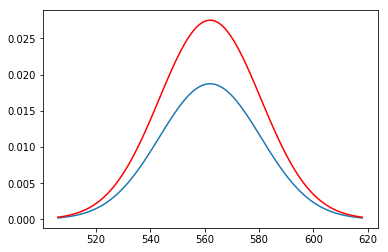

In [45]:
import math
import matplotlib.mlab as mlab

YDmu = 586
YDvariance = 453
YDsigma = math.sqrt(YDvariance)
YDx = np.linspace(YDmu - 3*YDsigma, YDmu + 3*YDsigma, 100)
plt.plot(x,mlab.normpdf(YDx, YDmu, YDsigma))


YNDmu = 541
YNDvariance = 210
YNDsigma = math.sqrt(YNDvariance)
YNDx = np.linspace(YNDmu - 3*YNDsigma, YNDmu + 3*YNDsigma, 100)
plt.plot(x,mlab.normpdf(YNDx, YNDmu, YNDsigma),color="red")

import scipy

print(scipy.stats.ttest_ind(df['JanuarySpend'], df['DecSpend']))

# lowered expenditure??? but its cause of weird youth

In [46]:
dfOD.describe()

,Customer ID,Age,Discount,JanuarySpend,DecSpend
count,255.000000,255.000000,255.000000,255.000000,255.000000
mean,1229.686275,40.658824,47.745098,561.142424,575.144096
std,682.743126,5.971493,8.005518,366.900187,434.531310
min,4.000000,31.000000,35.000000,-629.509787,78.182362
25%,611.500000,36.000000,40.000000,378.041071,143.111681
50%,1263.000000,41.000000,45.000000,574.250060,501.842332
75%,1804.000000,45.000000,55.000000,805.577524,829.903292
max,2398.000000,62.000000,60.000000,1843.166126,1534.535926


In [47]:
dfOND.describe()

,Customer ID,Age,Discount,JanuarySpend,DecSpend
count,489.000000,489.000000,489.0,489.000000,489.000000
mean,1200.439673,40.505112,0.0,468.490440,575.773489
std,694.478408,5.653636,0.0,336.911365,199.317550
min,7.000000,31.000000,0.0,-249.189402,28.583628
25%,588.000000,36.000000,0.0,239.120794,446.808434
50%,1235.000000,41.000000,0.0,372.396563,585.964803
75%,1790.000000,45.000000,0.0,635.351925,734.410872
max,2407.000000,62.000000,0.0,1899.542737,1082.148532


Ttest_indResult(statistic=-5.2374290740710965, pvalue=1.6976431562233368e-07)


C:\Users\Michelle\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
C:\Users\Michelle\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  from ipykernel import kernelapp as app


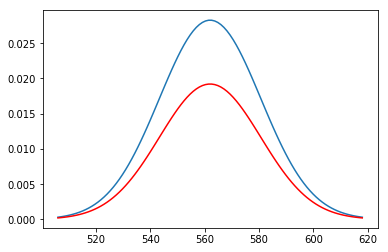

In [48]:
import math
import matplotlib.mlab as mlab

YDmu = 576
YDvariance = 199
YDsigma = math.sqrt(YDvariance)
YDx = np.linspace(YDmu - 3*YDsigma, YDmu + 3*YDsigma, 100)
plt.plot(x,mlab.normpdf(YDx, YDmu, YDsigma))


YNDmu = 575
YNDvariance = 431
YNDsigma = math.sqrt(YNDvariance)
YNDx = np.linspace(YNDmu - 3*YNDsigma, YNDmu + 3*YNDsigma, 100)
plt.plot(x,mlab.normpdf(YNDx, YNDmu, YNDsigma),color="red")

import scipy

print(scipy.stats.ttest_ind(df['JanuarySpend'], df['DecSpend']))

# higher w disc